### Business Case: Netflix - Data Exploration and Visualisation

#### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

#### Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt

plt.rcParams['figure.dpi'] = 140
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
df = pd.read_csv("C:/Users/srinj/Downloads/Business Case Netflix - Data Exploration and Visualisation/netflix.csv")

In [78]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [79]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicate row

In [80]:
df.shape

(8807, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


missing values per column

In [82]:
(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

replacing missing values of director, cast and country by "Unknown"

In [83]:
df["director"].fillna(value="Unknown", inplace=True)
df["cast"].fillna(value="Unknown", inplace=True)
df["country"].fillna(value="Unknown",inplace=True)

dropping the columns with NA values of date_added, rating, duration

In [84]:
df.dropna(inplace=True)

In [85]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [86]:
df.shape

(8790, 12)

dividing date column for visualization

In [87]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [88]:
df["Year_added"]=df["date_added"].dt.year

In [89]:
df["Month_added"]=df["date_added"].dt.month

In [90]:
df["Month_name"]=df["date_added"].dt.month_name()

In [91]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,Month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,September


dropping irrelevant columns

In [92]:
df.drop(["show_id","description","Month_added"], axis=1 , inplace= True)

df.head(1)

defining movie or series

In [93]:
df.loc[df['duration'].str.contains("min"),'content_type'] = 'Movie'
df.loc[df['duration'].str.contains("season"),'content_type'] = 'Series'

In [94]:
df.head(4)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Year_added,Month_name,content_type
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Movie
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,NaN
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,NaN


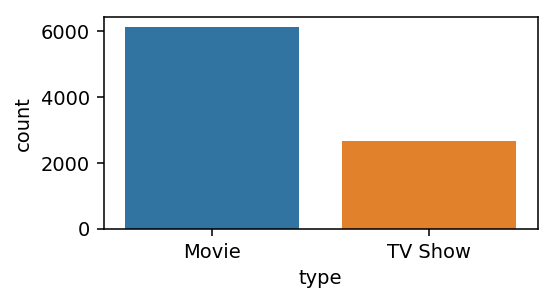

In [95]:
plt.figure(figsize=(4,2))
types = sns.countplot(data = df , x = "type")

In [96]:
df["type"].value_counts(dropna=False)

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [97]:
df["Movie_duration"] = df["duration"].loc[df["type"]=="Movie"]
df["Series_duration"] = df["duration"].loc[df["type"]=="TV Show"]

In [98]:
def split_duration(x):
    return str(x).split(" ")[0]

In [99]:
df["Movie_duration"] = df["Movie_duration"].apply(split_duration).astype("float")
df["Series_duration"] = df["Series_duration"].apply(split_duration).astype("float")

In [100]:
df.drop("duration",axis =1,inplace=True)

In [101]:
df.head(4)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,Year_added,Month_name,content_type,Movie_duration,Series_duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021,September,Movie,90.0,NaN
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021,September,NaN,NaN,2.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,September,NaN,NaN,1.0
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,"Docuseries, Reality TV",2021,September,NaN,NaN,1.0


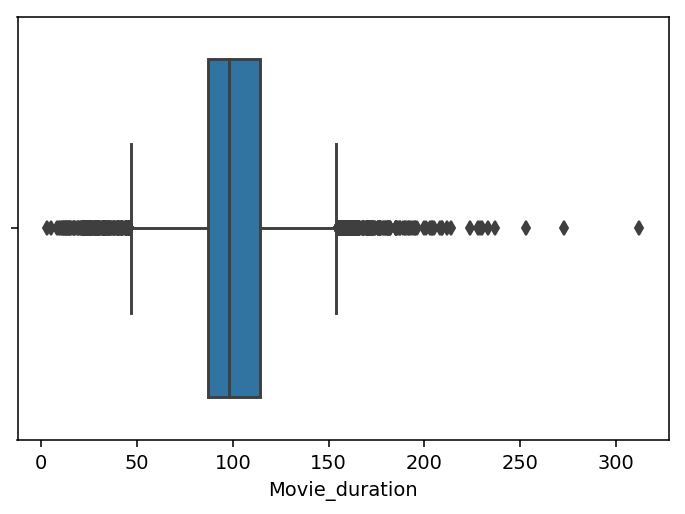

In [102]:
sns.boxplot(data=df, x="Movie_duration")

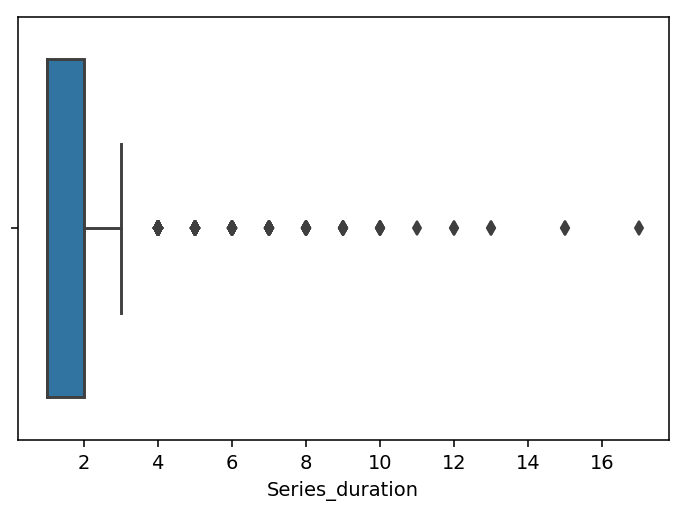

In [103]:
sns.boxplot(data=df, x="Series_duration")

##### Most movies are between 90-120 mins and most series are of 2 seasons

#### Content rating distribution

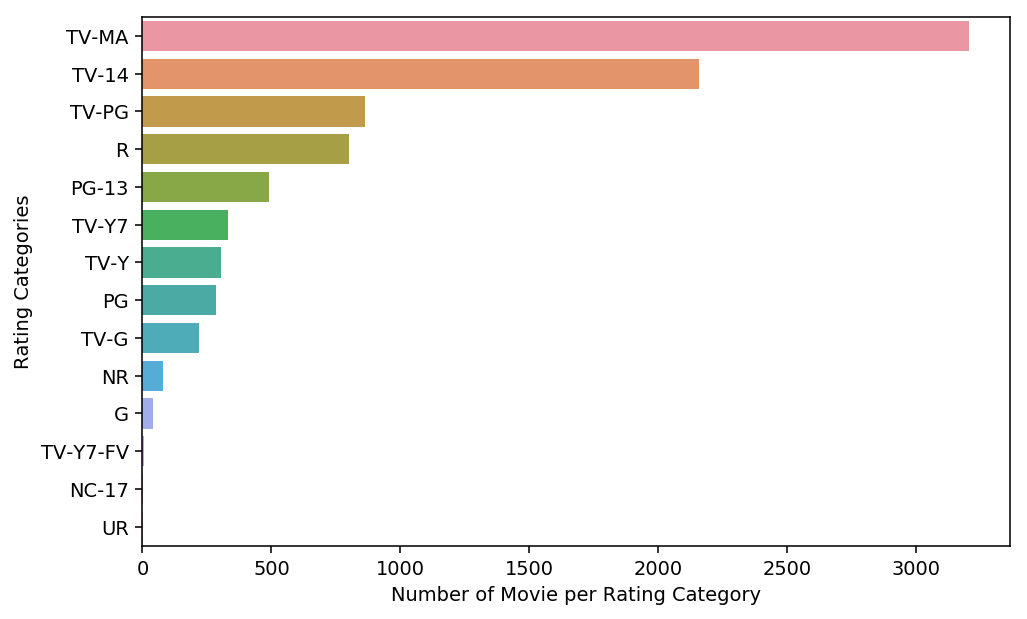

In [104]:
plt.figure(figsize=(8,5))
sns.barplot( x = df["rating"].value_counts().head(14),
                                y = df["rating"].value_counts().head(14).index)
plt.xlabel("Number of Movie per Rating Category")
plt.ylabel("Rating Categories")
plt.show()

In [105]:
df["rating"].value_counts(dropna=False)

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [106]:
df["audience"]=df["rating"].replace({"TV-MA":"Adults",
                     "TV-14" : "Teens",
                     "TV-PG" : "Older Kids",
                      "R":"Adults",
                      "PG-13":"Teens",
                      "TV-Y7":"Older Kids",
                      "TV-Y":"Kids",
                      "PG":"Older Kids",
                      "TV-G":"Kids",
                      "NR":"Adults",
                      "G":"Kids",
                      "TV-Y7-FV":"Older Kids",
                      "NC-17":"Adults",
                      "UR":"Adults"})

In [107]:
df["audience"].value_counts()

Adults        4089
Teens         2647
Older Kids    1487
Kids           567
Name: audience, dtype: int64

In [108]:
df["audience"].value_counts(normalize=True)*100

Adults        46.518771
Teens         30.113766
Older Kids    16.916951
Kids           6.450512
Name: audience, dtype: float64

46.5% content are for adults, 30% for teens, 17% for older kids and 6.5% for kids

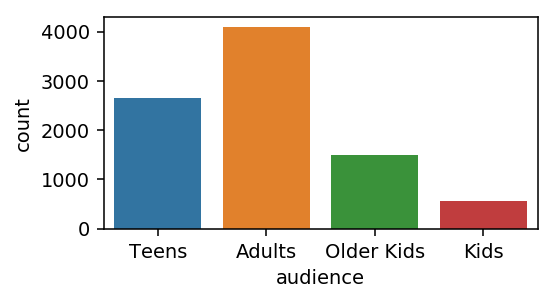

In [109]:
plt.figure(figsize=(4,2))
sns.countplot(x=df["audience"])

In [110]:
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,Year_added,Month_name,content_type,Movie_duration,Series_duration,audience
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021,September,Movie,90.0,NaN,Teens


In [111]:
df_by_year=df.groupby("Year_added")["title"].count().sort_values(ascending=True).tail(30).reset_index()

In [112]:
df_by_year.columns

Index(['Year_added', 'title'], dtype='object')

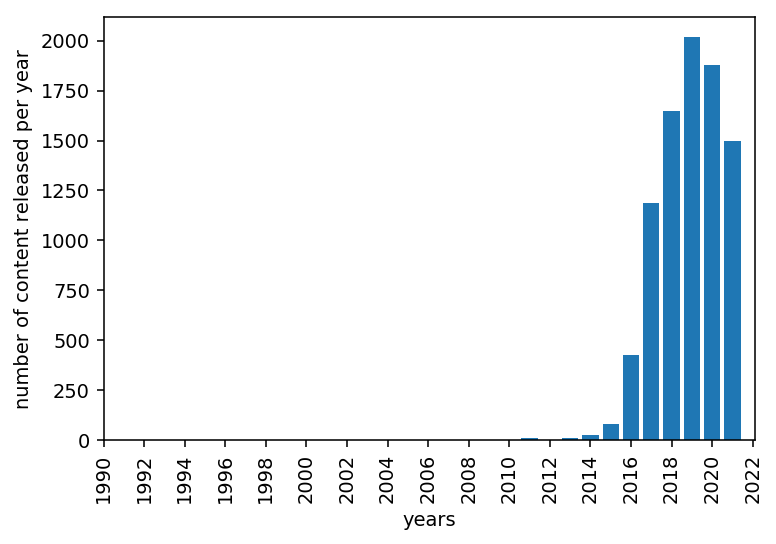

In [113]:
plt.figure(figsize=(6,4))
plt.bar(df_by_year["Year_added"],df_by_year["title"])

plt.xlabel("years")
plt.ylabel("number of content released per year")

plt.xticks(np.arange(1990,2023,2),rotation = 90)


plt.show()

#### During pandemic we have highest number of OTT releases

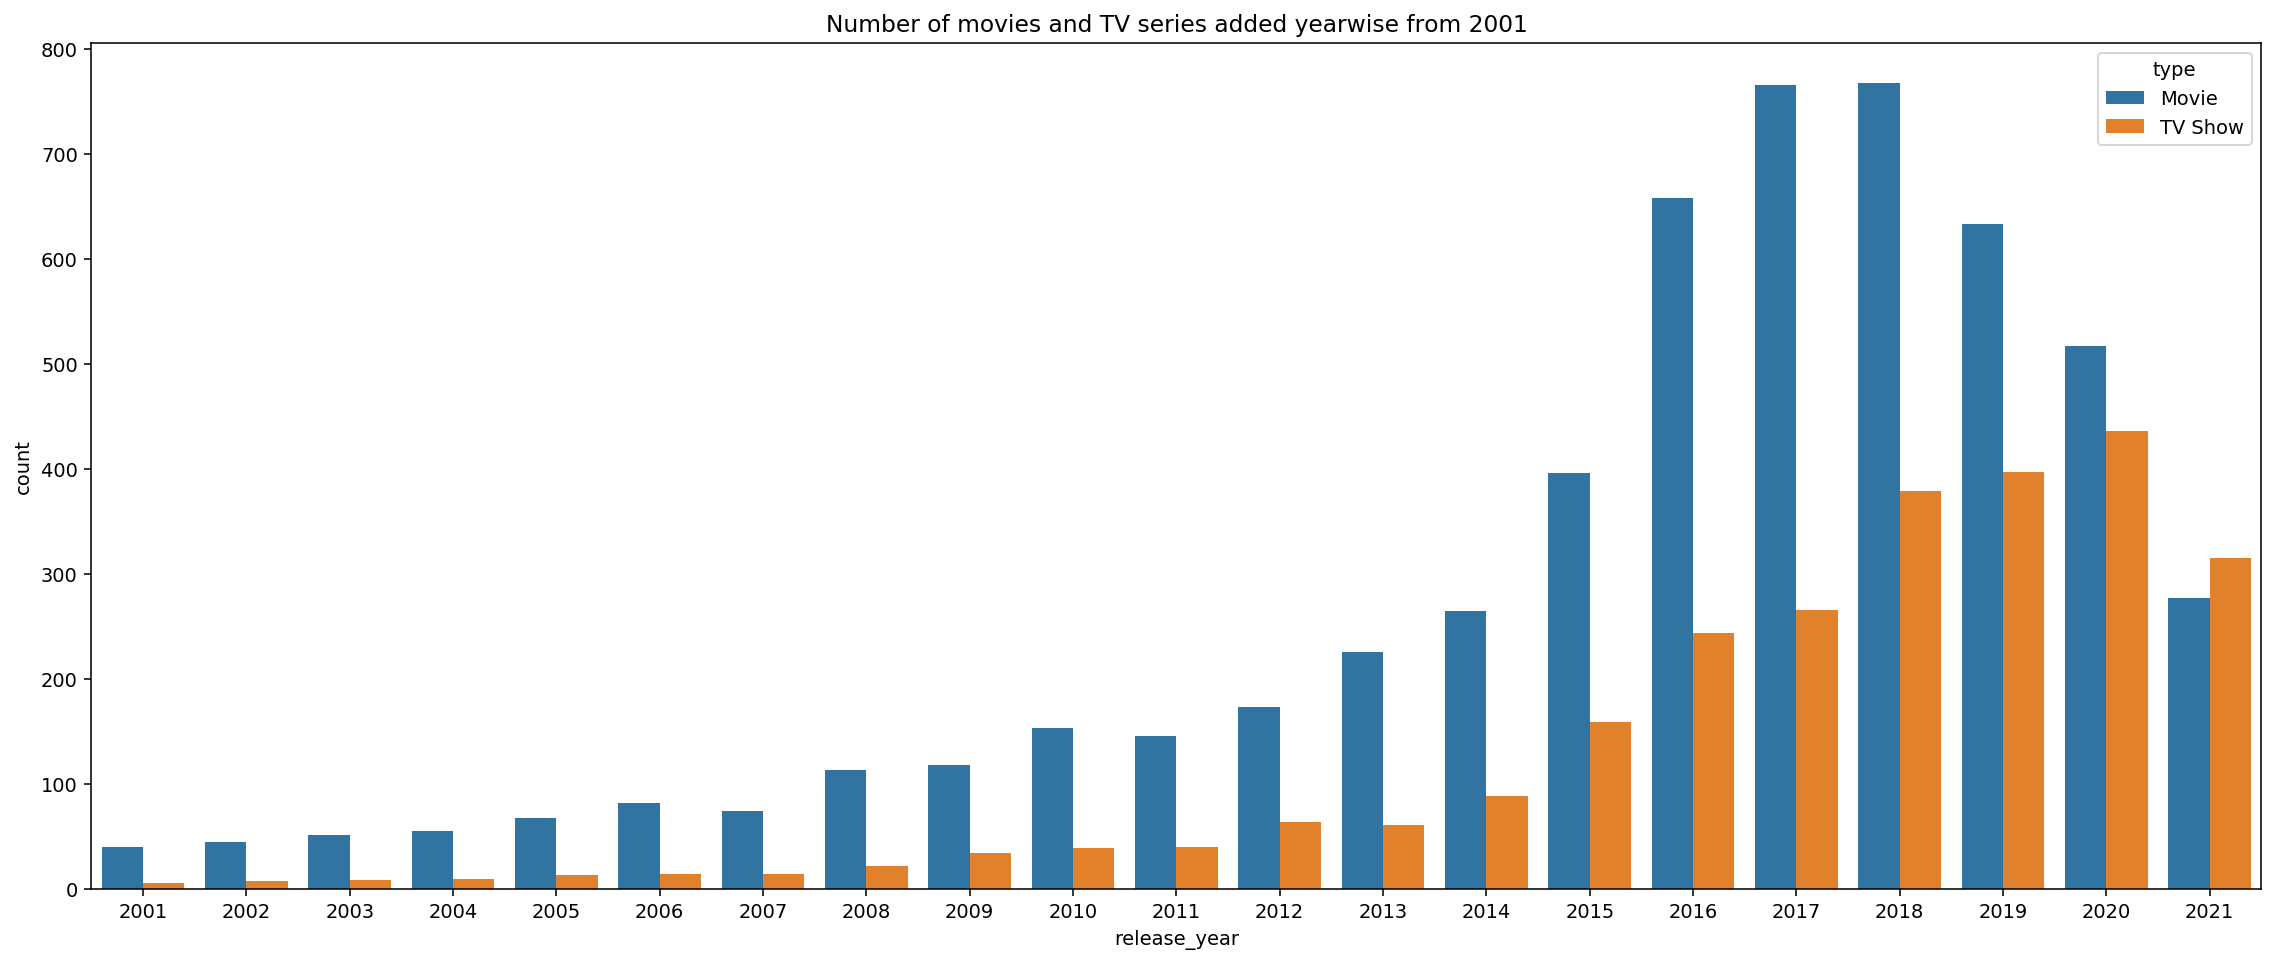

In [114]:
plt.figure(figsize=(20,8))
df_year = df.loc[df['release_year']>2000]
sns.countplot(x='release_year', data = df_year, hue='type')
plt.title("Number of movies and TV series added yearwise from 2001")
plt.show()

popularity of series has been increasing largely. In 2021 in surpassed the movie releases

In [115]:
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
df_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


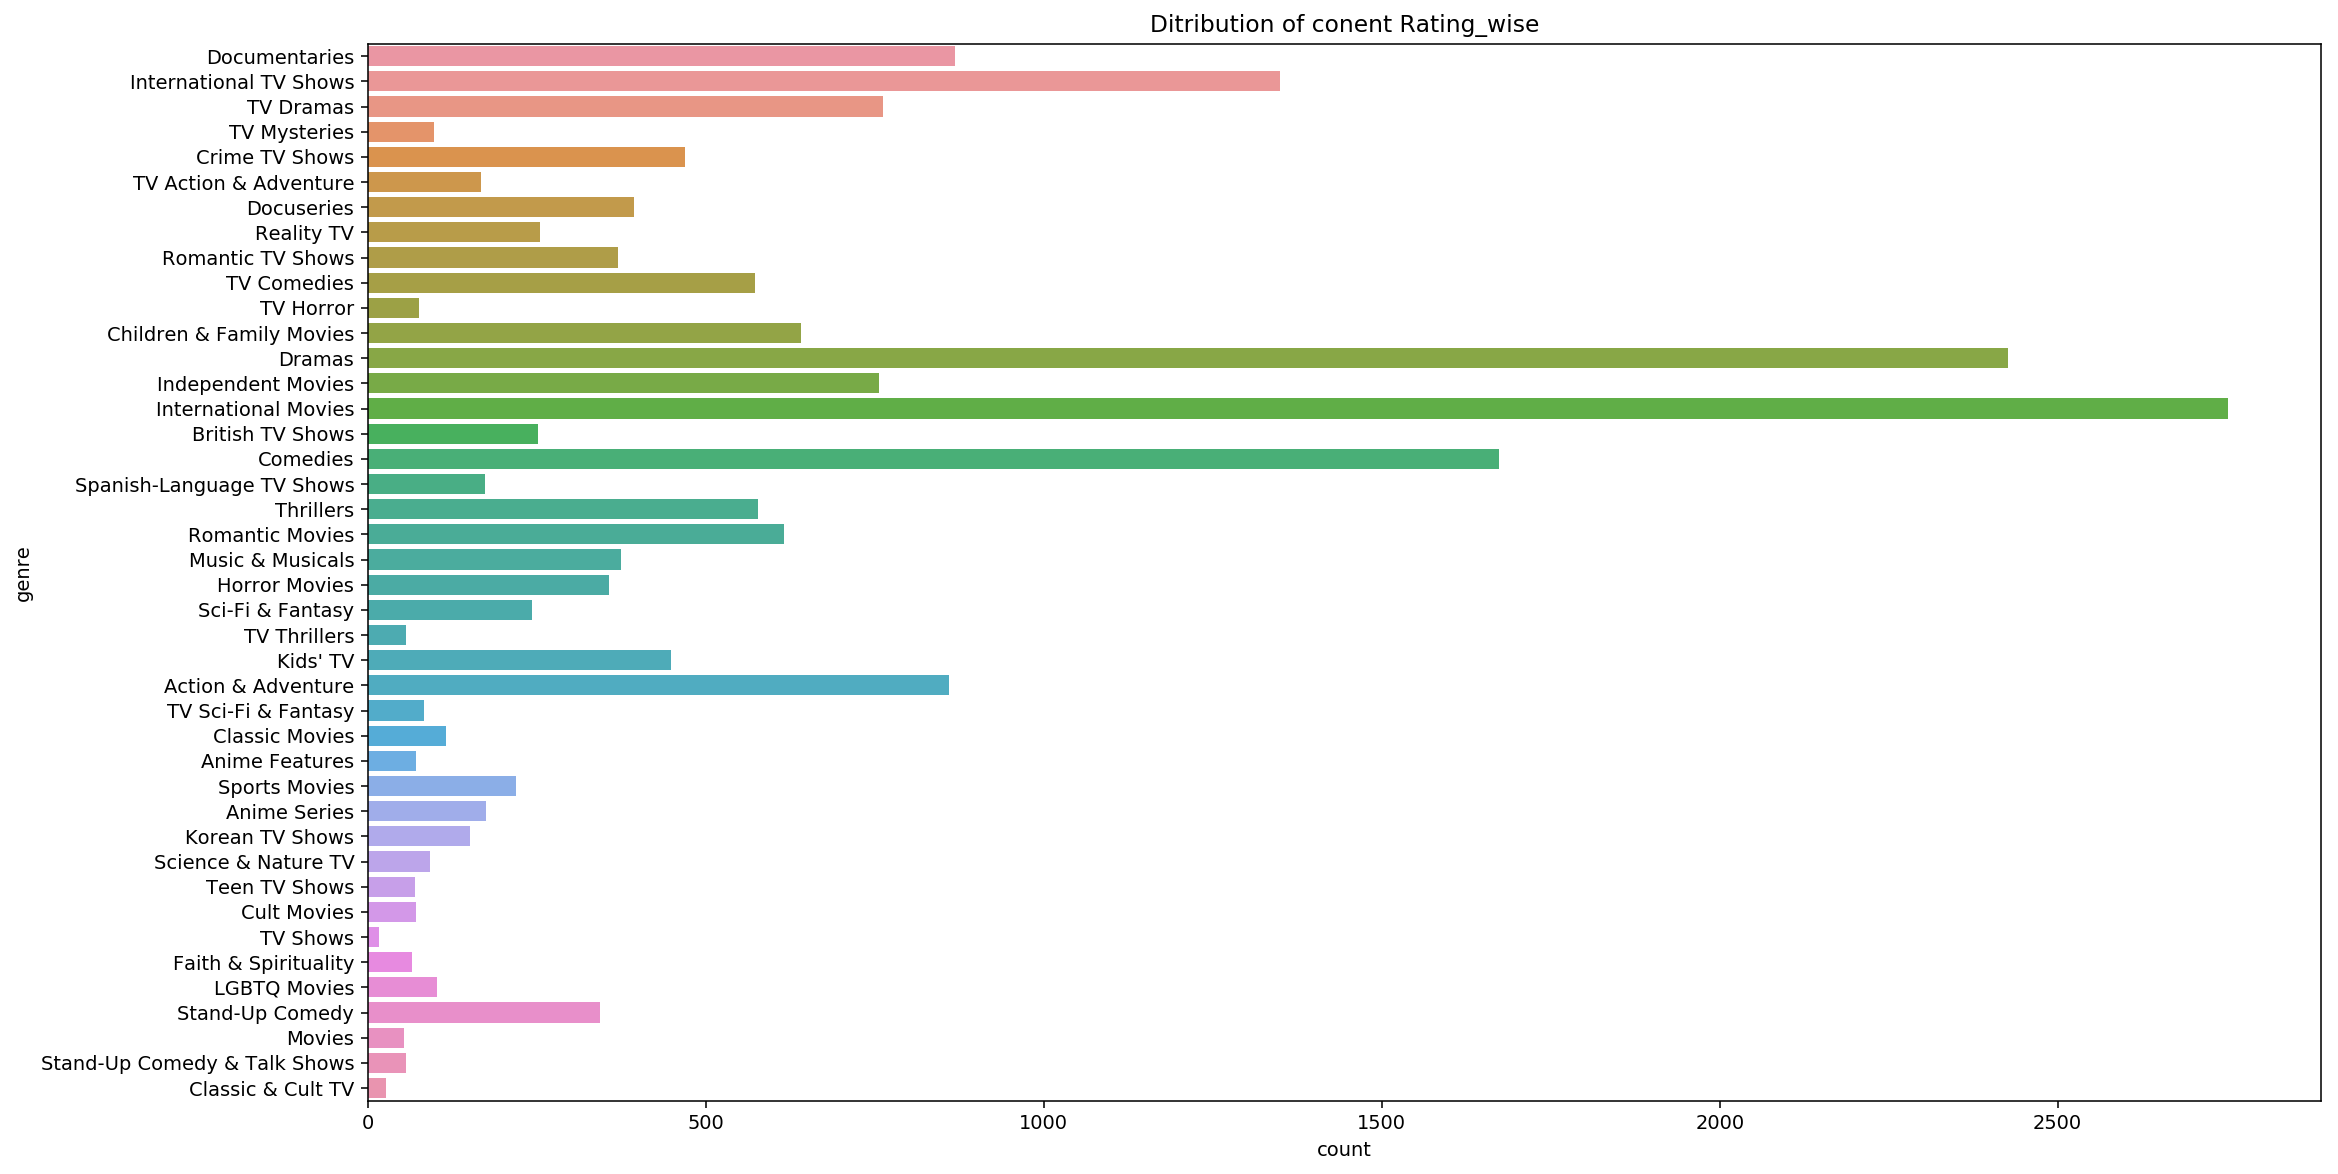

In [116]:
plt.figure(figsize = (18,10))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Ditribution of conent Rating_wise")
plt.show()

In [117]:
df_genre.groupby("genre")["title"].nunique().sort_values(ascending=False).head(25).reset_index()

,genre,title
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


#### International movies, dramas and comedies are top 3 genres

#### Country wise distribution

In [118]:
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]

In [119]:
df_country.head(1)

,title,country
0,Dick Johnson Is Dead,United States


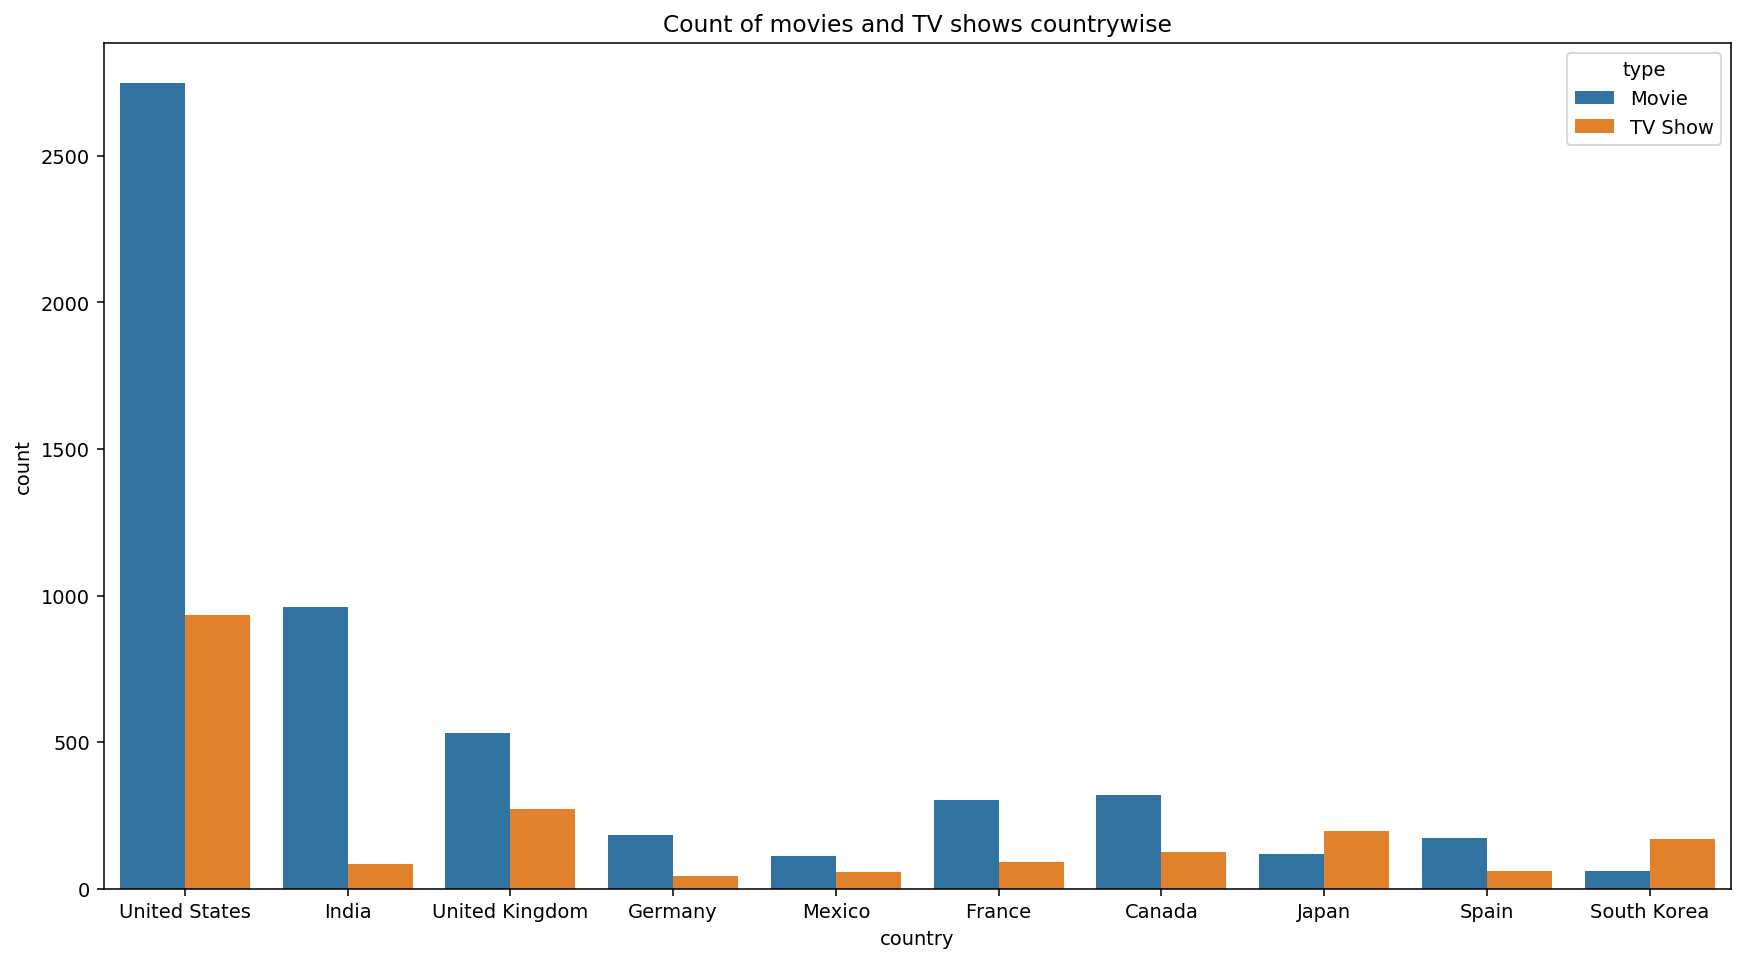

In [120]:
Country_wise_trend = df.merge(df_country , on = "title") #making new dataframe by merfing df_country and original dataframe.
Country_wise_trend.drop(columns = "country_x" , inplace = True)
Country_wise_trend.rename(columns = {"country_y" : "country"}, inplace = True)
Country_wise_trend = Country_wise_trend.loc[Country_wise_trend["country"] != "Unknown"]
top10_country = Country_wise_trend["country"].value_counts().head(10).reset_index()
top10_country.rename(columns = {"index" :"country" , "country" : "count"}, inplace = True)
Country_wise_trend = Country_wise_trend.merge(top10_country, how = "inner" , on = "country")
plt.figure(figsize = (15,8))
sns.countplot(x ="country" , data =Country_wise_trend , hue = "type" )
plt.title("Count of movies and TV shows countrywise")
plt.show()

#### top 10 country wise distribution for movies and series. 
#### Contents are US dominant.
#### Japan and S.Korea has more series than movies

In [121]:
df_country.groupby("country")["title"].nunique().sort_values(ascending=False).head(10)

country
United States     3680
India             1046
Unknown            829
United Kingdom     803
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Name: title, dtype: int64

In [122]:
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,Year_added,Month_name,content_type,Movie_duration,Series_duration,audience
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021,September,Movie,90.0,NaN,Teens


In [123]:
df.groupby("Year_added")["Movie_duration","Series_duration"].aggregate({
    "Movie_duration":"count",
    "Series_duration":"count"
}).reset_index()

,Year_added,Movie_duration,Series_duration
0,2008,1,1
1,2009,2,0
2,2010,1,0
3,2011,13,0
4,2012,3,0
5,2013,6,5
6,2014,19,5
7,2015,56,26
8,2016,251,175
9,2017,836,349


top 10 lengthy series

In [124]:
df.groupby("title")["Series_duration"].aggregate({"Series_duration":"max"}).sort_values(by="Series_duration",ascending=False).head(20)

,Series_duration
title,
Grey's Anatomy,17.0
Supernatural,15.0
NCIS,15.0
Heartland,13.0
COMEDIANS of the world,13.0
Trailer Park Boys,12.0
Criminal Minds,12.0
Cheers,11.0
LEGO Ninjago: Masters of Spinjitzu,10.0


top 10 lengthy movies

In [125]:
df.groupby("title")["Movie_duration"].aggregate({"Movie_duration":"max"}).sort_values(by="Movie_duration",ascending=False).head(10)

,Movie_duration
title,
Black Mirror: Bandersnatch,312.0
Headspace: Unwind Your Mind,273.0
The School of Mischief,253.0
No Longer kids,237.0
Lock Your Girls In,233.0
Raya and Sakina,230.0
Once Upon a Time in America,229.0
Sangam,228.0
Lagaan,224.0


In [126]:
df_for_country_audience = df.merge(df_country , on = "title")

In [127]:
df_for_country_audience.head(1)

,type,title,director,cast,country_x,date_added,release_year,rating,listed_in,Year_added,Month_name,content_type,Movie_duration,Series_duration,audience,country_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021,September,Movie,90.0,NaN,Teens,United States


In [130]:
df_for_heatmap1=df_for_country_audience.drop(["type", "title", "director", "cast", "country_x", "date_added", "release_year", "listed_in", "Year_added", "Month_name", "content_type", "Movie_duration", "Series_duration", "audience"], axis=1)

In [129]:
df_for_heatmap1.head(1)

,rating,country_y
0,PG-13,United States


In [131]:
df_for_heatmap1.head(15)

,rating,country_y
0,PG-13,United States
1,TV-MA,South Africa
2,TV-MA,Unknown
3,TV-MA,Unknown
4,TV-MA,India
5,TV-MA,Unknown
6,PG,Unknown
7,TV-MA,United States
8,TV-MA,Ghana
9,TV-MA,Burkina Faso


In [132]:
df_for_heatmap1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 10827
Data columns (total 2 columns):
rating       10828 non-null object
country_y    10828 non-null object
dtypes: object(2)
memory usage: 253.8+ KB


In [133]:
df_for_heatmap1['score'] = pd.Series([1 for x in range(len(df_for_heatmap1.index))])

In [134]:
df_for_heatmap1.head(4)

,rating,country_y,score
0,PG-13,United States,1
1,TV-MA,South Africa,1
2,TV-MA,Unknown,1
3,TV-MA,Unknown,1


In [138]:
df_for_heatmap1 = df_for_heatmap1.astype({"rating":'str',"country_y":'str'})

In [139]:
df_for_heatmap1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 10827
Data columns (total 3 columns):
rating       10828 non-null object
country_y    10828 non-null object
score        10828 non-null int64
dtypes: int64(1), object(2)
memory usage: 338.4+ KB


In [155]:
country_list = ["United States", "India", "Unknown", "United Kingdom", "Canada", "France", "Japan", "Spain", "South Korea", "Germany"]

top10_df = df_for_heatmap1[df_for_heatmap1['country_y'].isin(country_list)]

In [156]:
top10_df.head(20)

,rating,country_y,score
0,PG-13,United States,1
2,TV-MA,Unknown,1
3,TV-MA,Unknown,1
4,TV-MA,India,1
5,TV-MA,Unknown,1
6,PG,Unknown,1
7,TV-MA,United States,1
10,TV-MA,United Kingdom,1
11,TV-MA,Germany,1
13,TV-14,United Kingdom,1


In [157]:
top10_df = top10_df.pivot_table(values='score',index='rating',columns='country_y',aggfunc=np.sum)

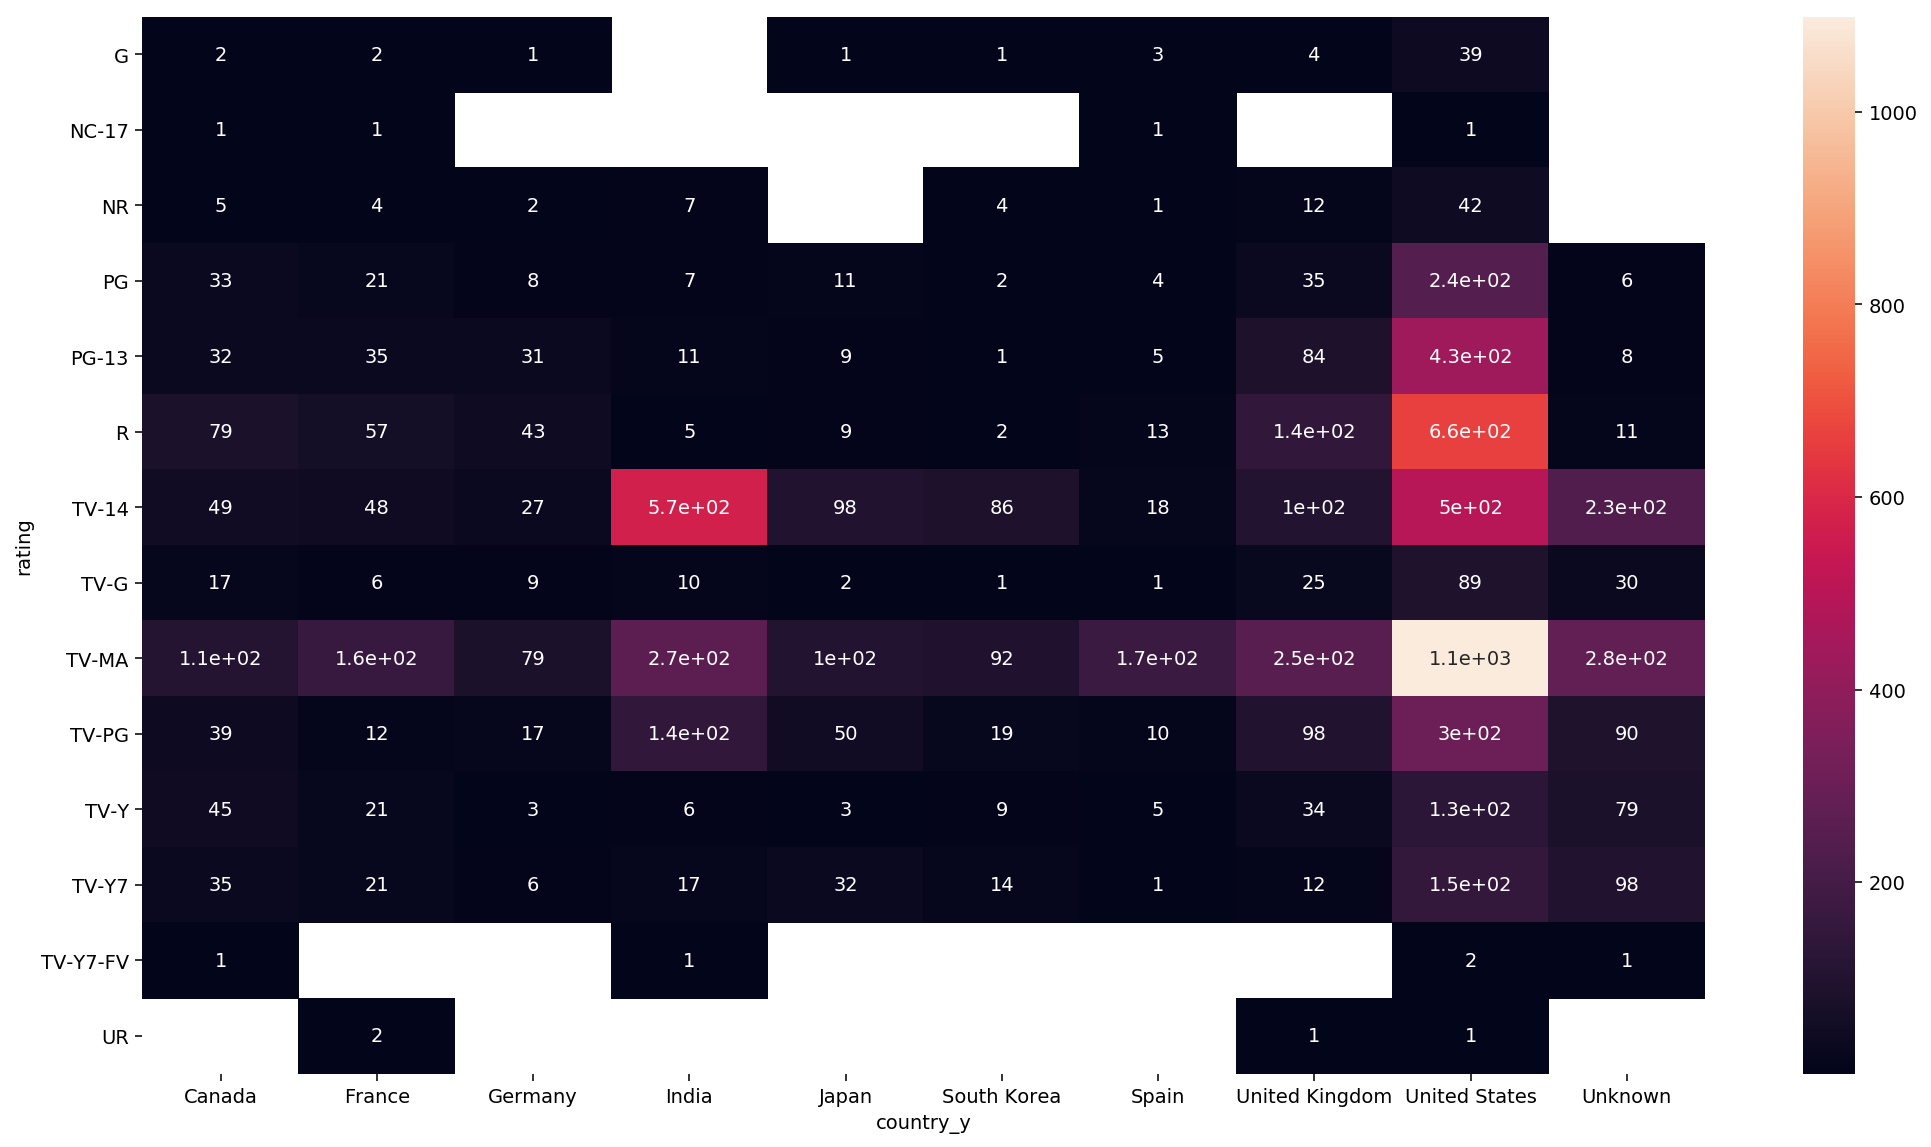

In [158]:
plt.figure(figsize = (18,10))
sns.heatmap(top10_df , annot = True)
plt.show()

In top 10 countries in general most content belongs to TV-MA (Adults Category)

India and United States are having large content in TV-14 category.

United Kingdom and United States are having large content in R category.

# **Summary :-**


*   Netflix added more movies as compare to TV shows
*   United States contributes the most on content for netflix 
*   In 2021 , there is significant amount of drop in content added due to COVID pandemic.
*   Most of viewers of Netflix is from United States followed by India & United Kingdom

**Movies:-**
* In United States , India and United kingdom movies are more popular as comapre to other countires 
* Mostly movies are of "100 min" duration.
* Top people casted in Movies are from India.

**TV Shows :-**
* TV Shows mostly are having season 1 and season 2 respectively. 
* For Japan and South Korea, netflix should focus more on TV showes as compare to movies 

## Recommendations: 

*Movies* :- 
* Preferd movies duration is between 90-100 minutes. 
* Netflix should add more movies for United States and India falling in category of Internation movies and comedies
* Top three countries where movies added are United States, India & United Kingdom.

*TV Show*:- 
* Preferd movies duration is 1-2 seeasons.
* Netflix should focus on countries like Japan, South Korea in TV shows , as they prefer TV shows over movies. 
* As per 2021 data, count of TV shows are more than movies, this indicates people prefer larger content, yet within 1/2 seasons
